## Импорт библиотек

In [ ]:
pip install bayesian-optimization

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
import warnings

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from bayes_opt import BayesianOptimization


In [ ]:
california_housing = fetch_california_housing()
df = pd.DataFrame(data=california_housing.data, columns=california_housing.feature_names)
df['MedHouseVal'] = california_housing.target
df


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
print("Размер датасета:", df.shape)
print("Пропущенные значения:")
print(df.isnull().sum())


Размер датасета: (20640, 9)
Пропущенные значения:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


##  EDA

In [ ]:
df.describe()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


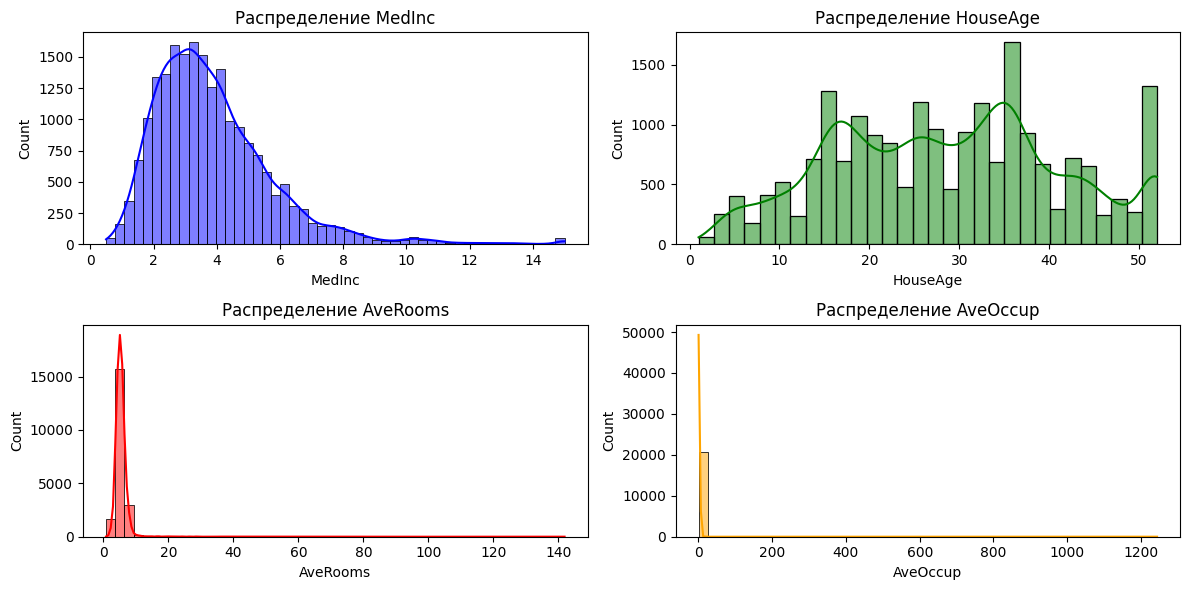

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.histplot(df['MedInc'], bins=50, kde=True, color='blue')
plt.title('Распределение MedInc')

plt.subplot(2, 2, 2)
sns.histplot(df['HouseAge'], bins=30, kde=True, color='green')
plt.title('Распределение HouseAge')

plt.subplot(2, 2, 3)
sns.histplot(df['AveRooms'], bins=50, kde=True, color='red')
plt.title('Распределение AveRooms')

plt.subplot(2, 2, 4)
sns.histplot(df['AveOccup'], bins=50, kde=True, color='orange')
plt.title('Распределение AveOccup')

plt.tight_layout()
plt.show()



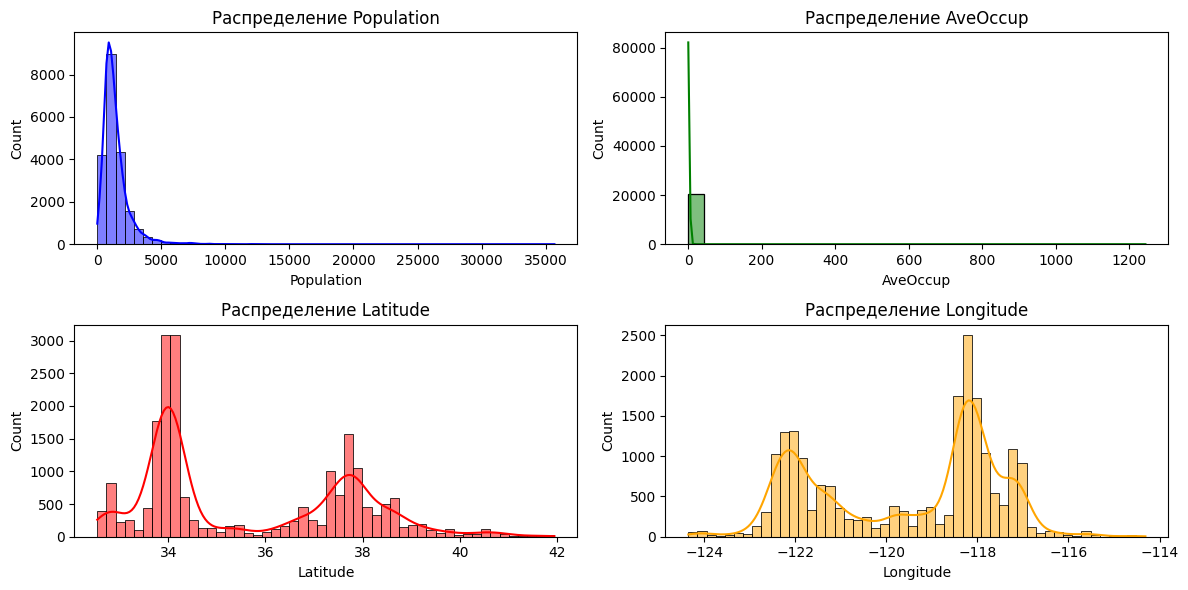

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.histplot(df['Population'], bins=50, kde=True, color='blue')
plt.title('Распределение Population')

plt.subplot(2, 2, 2)
sns.histplot(df['AveOccup'], bins=30, kde=True, color='green')
plt.title('Распределение AveOccup')

plt.subplot(2, 2, 3)
sns.histplot(df['Latitude'], bins=50, kde=True, color='red')
plt.title('Распределение Latitude')

plt.subplot(2, 2, 4)
sns.histplot(df['Longitude'], bins=50, kde=True, color='orange')
plt.title('Распределение Longitude')

plt.tight_layout()
plt.show()



Text(0.5, 1.0, 'Распределение MedHouseVal')

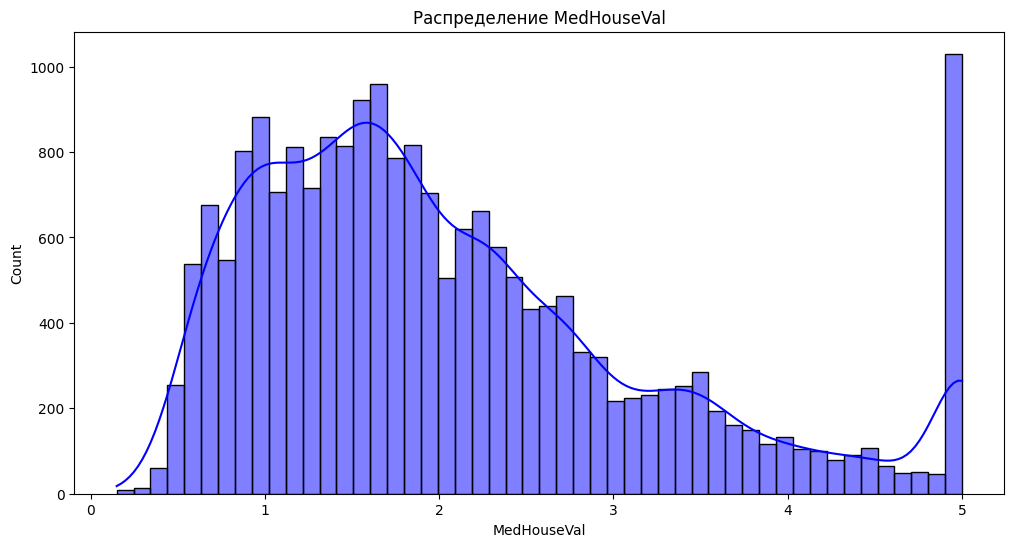

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['MedHouseVal'], bins=50, kde=True, color='blue')
plt.title('Распределение MedHouseVal')


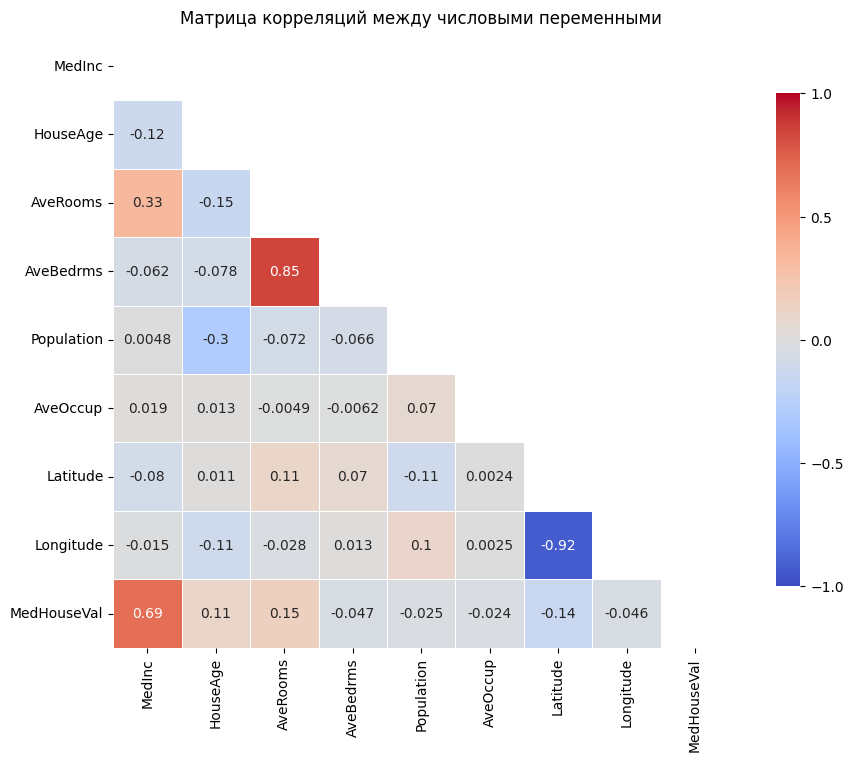

In [ ]:
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='coolwarm', vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot_kws={"size": 10},
            cbar_kws={"shrink": 0.8, "orientation": "vertical", "ticks": [-1, -0.5, 0, 0.5, 1]})
plt.title('Матрица корреляций между числовыми переменными')
plt.show()


In [ ]:
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Обучение модели c 2мя признаками

In [ ]:
correlation_matrix = df.corr()
print(correlation_matrix['MedHouseVal'].sort_values(ascending=False))


MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64


* Наибольшую коррелцию с таргетом имеют поля MedInc и AveRooms.

---



In [ ]:
X_train_selected = X_train[['MedInc', 'AveRooms']]
X_test_selected = X_test[['MedInc', 'AveRooms']]

model = LinearRegression()
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'R²: {r2:.4f}')
print(f'MSE: {mse:.4f}')
print(f'MAE: {mae:.4f}')


R²: 0.4642
MSE: 0.7022
MAE: 0.6247


##  Обучение модели со всеми признаками

In [ ]:
model_all_features = LinearRegression()
model_all_features.fit(X_train, y_train)

y_pred_all_features = model_all_features.predict(X_test)

mse_all = mean_squared_error(y_test, y_pred_all_features)
mae_all = mean_absolute_error(y_test, y_pred_all_features)
r2_all = r2_score(y_test, y_pred_all_features)

print(f'R² (все признаки): {r2_all:.4f}')
print(f'MSE (все признаки): {mse_all:.4f}')
print(f'MAE (все признаки): {mae_all:.4f}')


R² (все признаки): 0.5758
MSE (все признаки): 0.5559
MAE (все признаки): 0.5332


* Метрики ошибок снизились (R2 увеличился из-за добавления большего количества признаков)

## Обучение MLP

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled


array([[-0.326196  ,  0.34849025, -0.17491646, ...,  0.05137609,
        -1.3728112 ,  1.27258656],
       [-0.03584338,  1.61811813, -0.40283542, ..., -0.11736222,
        -0.87669601,  0.70916212],
       [ 0.14470145, -1.95271028,  0.08821601, ..., -0.03227969,
        -0.46014647, -0.44760309],
       ...,
       [-0.49697313,  0.58654547, -0.60675918, ...,  0.02030568,
        -0.75500738,  0.59946887],
       [ 0.96545045, -1.07984112,  0.40217517, ...,  0.00707608,
         0.90651045, -1.18553953],
       [-0.68544764,  1.85617335, -0.85144571, ..., -0.08535429,
         0.99543676, -1.41489815]])

In [ ]:
mlp = MLPRegressor(hidden_layer_sizes=(150, 50, 10),
max_iter=1000,
alpha = 0.001,
solver = 'adam',
random_state=42)
mlp.fit(X_train_scaled, y_train)


MLPRegressor(alpha=0.001, hidden_layer_sizes=(150, 50, 10), max_iter=1000,
             random_state=42)

In [ ]:
y_pred = mlp.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'R²: {r2:.4f}')
print(f'MSE: {mse:.4f}')
print(f'MAE: {mae:.4f}')


R²: 0.7970
MSE: 0.2660
MAE: 0.3458


R стремится к 1, а значит эта модель имеет преимущества в точности прогнозирования целевого признака **MedHouseVal**

**ДОМАШНЕЕ ЗАДАНИЕ 7**

Построение моделей:
— Разделите данные на обучающую и тестовую выборки.

— Постройте и обучите модели RandomForestRegressor и GradientBoostingRegressor.

— Постарайтесь оптимизировать их гиперпараметры для улучшения результатов на обучающей выборке.

In [ ]:
X = df.drop(columns=['MedHouseVal'])
y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Размер X_train: {len(X_train)}")
print(f"Размер X_test: {len(X_test)}")
print(f"Размер y_train: {len(y_train)}")
print(f"Размер y_test: {len(y_test)}")

Размер X_train: 16512
Размер X_test: 4128
Размер y_train: 16512
Размер y_test: 4128


RandomForestRegressor

In [ ]:
def rf_cv(n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features):
    n_estimators = int(n_estimators)
    max_depth = None if int(max_depth) == 0 else int(max_depth)
    min_samples_split = int(min_samples_split)
    min_samples_leaf = int(min_samples_leaf)
    max_features = float(max_features)

    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42,
        n_jobs=-1
    )

    # Кросс-валидация
    scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    # Возвращаем среднее значение RMSE
    return scores.mean()

# Определение пространства параметров для байесовской оптимизации
param_bounds = {
    'n_estimators': (100, 300),
    'max_depth': (0, 30),  # 0 означает None
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 4),
    'max_features': (0.1, 1.0)  # Пропорция от числа признаков
}

optimizer = BayesianOptimization(
    f=rf_cv,
    pbounds=param_bounds,
    random_state=42,
    verbose=2
)

optimizer.maximize(init_points=10, n_iter=30)
best_params_rf = optimizer.max['params']
best_params_rf['n_estimators'] = int(best_params_rf['n_estimators'])
best_params_rf['max_depth'] = None if int(best_params_rf['max_depth']) == 0 else int(best_params_rf['max_depth'])
best_params_rf['min_samples_split'] = int(best_params_rf['min_samples_split'])
best_params_rf['min_samples_leaf'] = int(best_params_rf['min_samples_leaf'])
best_params_rf['max_features'] = float(best_params_rf['max_features'])


best_model_rf = RandomForestRegressor(
    **best_params_rf,
    random_state=42,
    n_jobs=-1
)
best_model_rf.fit(X_train, y_train)
best_train_preds_rf = best_model_rf.predict(X_train)
best_train_rmse_rf = mean_squared_error(y_train, best_train_preds_rf, squared=False)
print(f"Лучшие параметры RandomForestRegressor: {best_params_rf}")
print(f"RMSE на обучающей выборке с лучшими параметрами: {best_train_rmse_rf:.2f}")

|   iter    |  target   | max_depth | max_fe... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------
| 1         | -0.2775   | 11.24     | 0.9556    | 3.196     | 6.789     | 131.2     |
| 2         | -0.7559   | 4.68      | 0.1523    | 3.599     | 6.809     | 241.6     |
| 3         | -0.2606   | 0.6175    | 0.9729    | 3.497     | 3.699     | 136.4     |
| 4         | -0.4907   | 5.502     | 0.3738    | 2.574     | 5.456     | 158.2     |
| 5         | -0.2938   | 18.36     | 0.2255    | 1.876     | 4.931     | 191.2     |
| 6         | -0.2538   | 23.56     | 0.2797    | 2.543     | 6.739     | 109.3     |
| 7         | -0.2528   | 18.23     | 0.2535    | 1.195     | 9.591     | 293.1     |
| 8         | -0.2505   | 24.25     | 0.3742    | 1.293     | 7.474     | 188.0     |
| 9         | -0.5883   | 3.661     | 0.5457    | 1.103     | 9.275     | 151.8     |
| 10        | -0.2495   | 19.88     | 0.3805    | 2.56

In [ ]:
best_train_r2_rf = r2_score(y_train, best_train_preds_rf)
print(f"R² на обучающей выборке с лучшими параметрами: {best_train_r2_rf:.2f}")

R² на обучающей выборке с лучшими параметрами: 0.98


GradientBoostingRegressor

In [ ]:
def gbr_cv(n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features, learning_rate):
    n_estimators = int(n_estimators)
    max_depth = None if int(max_depth) == 0 else int(max_depth)
    min_samples_split = int(min_samples_split)
    min_samples_leaf = int(min_samples_leaf)
    max_features = float(max_features)
    learning_rate = float(learning_rate)

    model = GradientBoostingRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        learning_rate=learning_rate,
        random_state=42
    )

    scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=3)
    return scores.mean()

param_bounds = {
    'n_estimators': (100, 300),
    'max_depth': (1, 30),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 4),
    'max_features': (0.1, 1.0),
    'learning_rate': (0.01, 0.3)
}

optimizer = BayesianOptimization(
    f=gbr_cv,
    pbounds=param_bounds,
    random_state=42,
    verbose=2
)

optimizer.maximize(init_points=2, n_iter=3)
best_params_gbr = optimizer.max['params']
best_params_gbr['n_estimators'] = int(best_params_gbr['n_estimators'])
best_params_gbr['max_depth'] = int(best_params_gbr['max_depth'])
best_params_gbr['min_samples_split'] = int(best_params_gbr['min_samples_split'])
best_params_gbr['min_samples_leaf'] = int(best_params_gbr['min_samples_leaf'])
best_params_gbr['max_features'] = float(best_params_gbr['max_features'])
best_params_gbr['learning_rate'] = float(best_params_gbr['learning_rate'])

best_model_gbr = GradientBoostingRegressor(
    **best_params_gbr,
    random_state=42
)
best_model_gbr.fit(X_train, y_train)
best_train_preds_gbr = best_model_gbr.predict(X_train)
best_train_rmse_gbr = mean_squared_error(y_train, best_train_preds_gbr, squared=False)
print(f"Лучшие параметры GradientBoostingRegressor: {best_params_gbr}")
print(f"RMSE на обучающей выборке с лучшими параметрами: {best_train_rmse_gbr:.2f}")

|   iter    |  target   | learni... | max_depth | max_fe... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------------------
| 1         | -0.278    | 0.1186    | 28.57     | 0.7588    | 2.796     | 3.248     | 131.2     |
| 2         | -0.2497   | 0.02684   | 26.12     | 0.641     | 3.124     | 2.165     | 294.0     |
| 3         | -0.2856   | 0.2909    | 26.46     | 0.7062    | 3.547     | 3.243     | 293.5     |
| 4         | -0.3123   | 0.01942   | 7.242     | 0.1553    | 1.263     | 9.659     | 191.0     |
| 5         | -0.2627   | 0.2186    | 23.64     | 0.45      | 2.209     | 9.781     | 272.0     |
Лучшие параметры GradientBoostingRegressor: {'learning_rate': 0.026844247528777843, 'max_depth': 26, 'max_features': 0.6410035105688879, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 293}
RMSE на обучающей выборке с лучшими параметрами: 0.01


Оценка моделей:

— Оцените качество моделей на тестовой выборке с использованием метрик RMSE (Root Mean Squared Error) и R² (коэффициент детерминации).

— Сравните результаты моделей, интерпретируйте их.

In [ ]:
test_preds_rf = best_model_rf.predict(X_test)
test_rmse_rf = mean_squared_error(y_test, test_preds_rf, squared=False)
test_r2_rf = r2_score(y_test, test_preds_rf)
print(f"RandomForestRegressor - RMSE на тестовой выборке: {test_rmse_rf:.2f}")
print(f"RandomForestRegressor - R² на тестовой выборке: {test_r2_rf:.2f}")

test_preds_gbr = best_model_gbr.predict(X_test)
test_rmse_gbr = mean_squared_error(y_test, test_preds_gbr, squared=False)
test_r2_gbr = r2_score(y_test, test_preds_gbr)
print(f"GradientBoostingRegressor - RMSE на тестовой выборке: {test_rmse_gbr:.2f}")
print(f"GradientBoostingRegressor - R² на тестовой выборке: {test_r2_gbr:.2f}")

RandomForestRegressor - RMSE на тестовой выборке: 0.49
RandomForestRegressor - R² на тестовой выборке: 0.82
GradientBoostingRegressor - RMSE на тестовой выборке: 0.48
GradientBoostingRegressor - R² на тестовой выборке: 0.82


Модели практически одинаковы по исследуемым параметрам

Анализ важности признаков и выводы:

— Используйте атрибут feature_importances_ для оценки важности признаков в каждой модели.

— На основе полученных данных сделайте выводы о том, какие признаки наиболее значимы и почему.

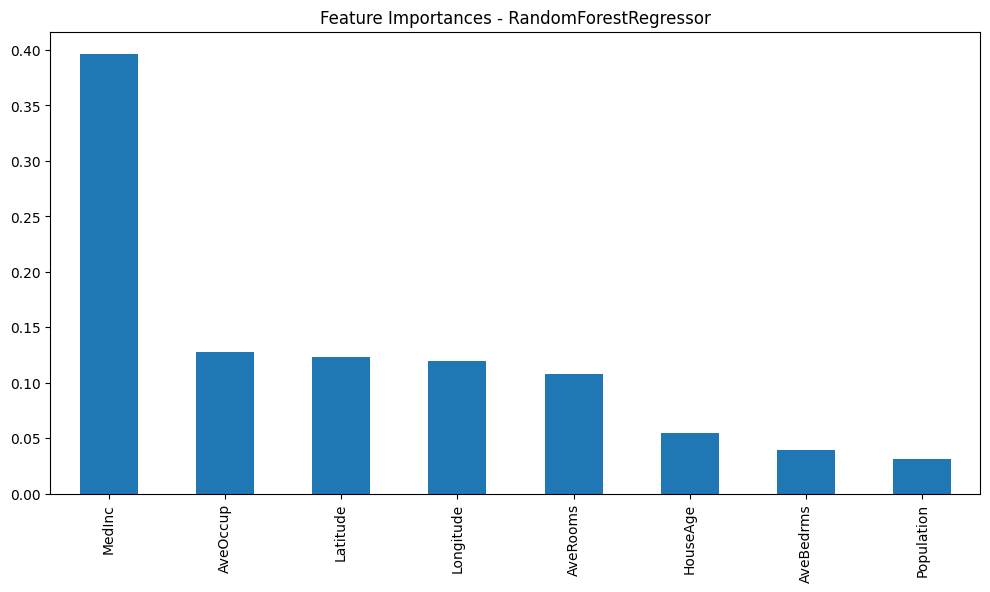

In [ ]:
importances_rf = best_model_rf.feature_importances_
features_rf = pd.Series(importances_rf, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
features_rf.plot(kind='bar')
plt.title('Feature Importances - RandomForestRegressor')
plt.show()

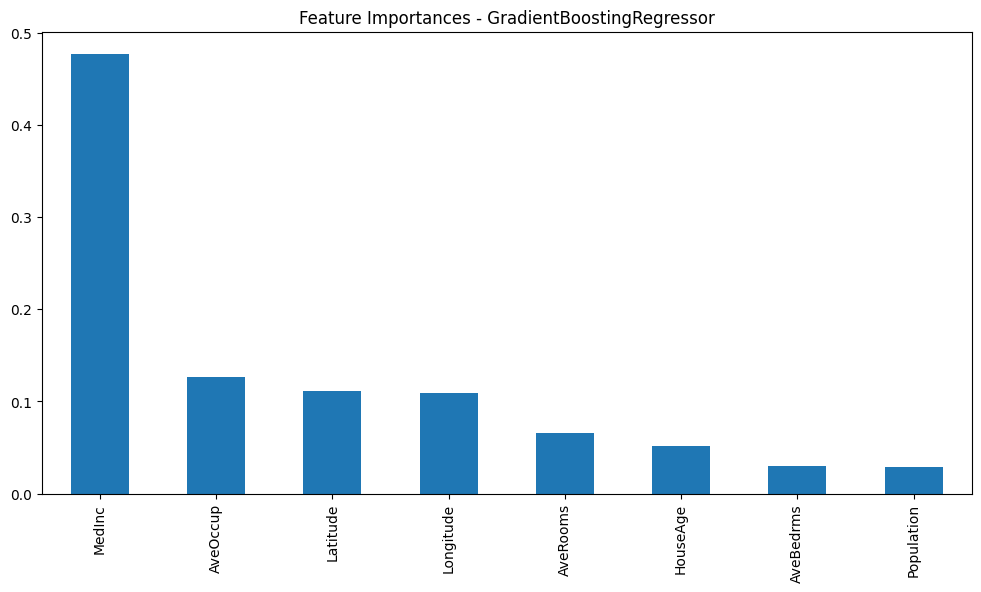

In [ ]:
importances_gbr = best_model_gbr.feature_importances_
features_gbr = pd.Series(importances_gbr, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
features_gbr.plot(kind='bar')
plt.title('Feature Importances - GradientBoostingRegressor')
plt.show()

Как и можно было предположить, наиболее важным паратметром является MedInc

In [ ]:
# Удаление наиболее важных признаков
X_train_less_important = X_train.drop(columns=features_rf.head(3).index)
X_test_less_important = X_test.drop(columns=features_rf.head(3).index)

# Удаление наименее важных признаков
X_train_more_important = X_train.drop(columns=features_rf.tail(3).index)
X_test_more_important = X_test.drop(columns=features_rf.tail(3).index)

print(f"Размер X_train_less_important: {len(X_train_less_important)}")
print(f"Размер X_test_less_important: {len(X_test_less_important)}")
print(f"Размер X_train_more_important: {len(X_train_more_important)}")
print(f"Размер X_test_more_important: {len(X_test_more_important)}")
print(f"Размер y_train: {len(y_train)}")
print(f"Размер y_test: {len(y_test)}")

Размер X_train_less_important: 16512
Размер X_test_less_important: 4128
Размер X_train_more_important: 16512
Размер X_test_more_important: 4128
Размер y_train: 16512
Размер y_test: 4128


In [ ]:
# Переобучение моделей на данных с удаленными важными признаками

best_model_rf_less_important = RandomForestRegressor(
    **best_params_rf,
    random_state=42,
    n_jobs=-1
)
best_model_rf_less_important.fit(X_train_less_important, y_train)

best_model_gbr_less_important = GradientBoostingRegressor(
    **best_params_gbr,
    random_state=42
)
best_model_gbr_less_important.fit(X_train_less_important, y_train)

GradientBoostingRegressor(learning_rate=0.026844247528777843, max_depth=26,
                          max_features=0.6410035105688879, min_samples_leaf=3,
                          n_estimators=293, random_state=42)

In [ ]:
# Переобучение моделей на данных с удаленными неважными признаками

best_model_rf_more_important = RandomForestRegressor(
    **best_params_rf,
    random_state=42,
    n_jobs=-1
)
best_model_rf_more_important.fit(X_train_more_important, y_train)

best_model_gbr_more_important = GradientBoostingRegressor(
    **best_params_gbr,
    random_state=42
)
best_model_gbr_more_important.fit(X_train_more_important, y_train)

GradientBoostingRegressor(learning_rate=0.026844247528777843, max_depth=26,
                          max_features=0.6410035105688879, min_samples_leaf=3,
                          n_estimators=293, random_state=42)

In [ ]:
# Оценка моделей на тестовой выборке после удаления важных признаков
test_preds_rf_less_important = best_model_rf_less_important.predict(X_test_less_important)
test_rmse_rf_less_important = mean_squared_error(y_test, test_preds_rf_less_important, squared=False)
test_r2_rf_less_important = r2_score(y_test, test_preds_rf_less_important)

test_preds_gbr_less_important = best_model_gbr_less_important.predict(X_test_less_important)
test_rmse_gbr_less_important = mean_squared_error(y_test, test_preds_gbr_less_important, squared=False)
test_r2_gbr_less_important = r2_score(y_test, test_preds_gbr_less_important)

print("Удаление наиболее важных признаков:")
print(f"RandomForestRegressor - RMSE: {test_rmse_rf_less_important:.2f}, R²: {test_r2_rf_less_important:.2f}")
print(f"GradientBoostingRegressor - RMSE: {test_rmse_gbr_less_important:.2f}, R²: {test_r2_gbr_less_important:.2f}")


# Оценка моделей на тестовой выборке после удаления неважных признаков
test_preds_rf_more_important = best_model_rf_more_important.predict(X_test_more_important)
test_rmse_rf_more_important = mean_squared_error(y_test, test_preds_rf_more_important, squared=False)
test_r2_rf_more_important = r2_score(y_test, test_preds_rf_more_important)

test_preds_gbr_more_important = best_model_gbr_more_important.predict(X_test_more_important)
test_rmse_gbr_more_important = mean_squared_error(y_test, test_preds_gbr_more_important, squared=False)
test_r2_gbr_more_important = r2_score(y_test, test_preds_gbr_more_important)

print("\nУдаление наименее важных признаков:")
print(f"RandomForestRegressor - RMSE: {test_rmse_rf_more_important:.2f}, R²: {test_r2_rf_more_important:.2f}")
print(f"GradientBoostingRegressor - RMSE: {test_rmse_gbr_more_important:.2f}, R²: {test_r2_gbr_more_important:.2f}")

Удаление наиболее важных признаков:
RandomForestRegressor - RMSE: 0.79, R²: 0.52
GradientBoostingRegressor - RMSE: 0.78, R²: 0.53

Удаление наименее важных признаков:
RandomForestRegressor - RMSE: 0.50, R²: 0.81
GradientBoostingRegressor - RMSE: 0.48, R²: 0.82


Удаление неважных признаков повышает качество обучаемой модели